# Accessing all profiles at once 

Conveniently, all the core mision profiles are compated in a single file, named: `<FloatWmoID>_prof.nc`. However, some information is only in the individual profile files, but we will see it. 

Let's start loading the neccesary python modules and the netCDF file **6901254/6901254_prof.nc**

In [3]:
import numpy as np
import xarray as xr
import netCDF4
from matplotlib import pyplot as plt
%matplotlib inline

In [4]:
prof  = xr.open_dataset('../../Data/6901254/6901254_prof.nc')

In [6]:
prof

<xarray.Dataset>
Dimensions:                       (N_PROF: 66, N_PARAM: 3, N_LEVELS: 98, N_CALIB: 1, N_HISTORY: 0)
Dimensions without coordinates: N_PROF, N_PARAM, N_LEVELS, N_CALIB, N_HISTORY
Data variables: (12/64)
    DATA_TYPE                     object b'Argo profile    '
    FORMAT_VERSION                object b'3.1 '
    HANDBOOK_VERSION              object b'1.2 '
    REFERENCE_DATE_TIME           object b'19500101000000'
    DATE_CREATION                 object b'20181030164714'
    DATE_UPDATE                   object b'20200625160947'
    ...                            ...
    HISTORY_ACTION                (N_HISTORY, N_PROF) object 
    HISTORY_PARAMETER             (N_HISTORY, N_PROF) object 
    HISTORY_START_PRES            (N_HISTORY, N_PROF) float32 
    HISTORY_STOP_PRES             (N_HISTORY, N_PROF) float32 
    HISTORY_PREVIOUS_VALUE        (N_HISTORY, N_PROF) float32 
    HISTORY_QCTEST                (N_HISTORY, N_PROF) object 
Attributes:
    title:                Argo float vertical profile
    institution:          FR GDAC
    source:               Argo float
    history:              2020-06-25T16:09:47Z creation
    references:           http://www.argodatamgt.org/Documentation
    user_manual_version:  3.1
    Conventions:          Argo-3.1 CF-1.6
    featureType:          trajectoryProfile

In this case, N_PROF is 66, since there are 66 profiles, including two for the first cycle, the descending and the ascending. These profiles are just the 'Primary sampling', if you need the high-resolution upper 5 dbar you have to use the individual cycle files, LOADING '../../Data/6901254/profiles/R6901254_001.nc' as we saw in the previous chapter.

Let's visualize all the salinity observations, a first a quick-look 

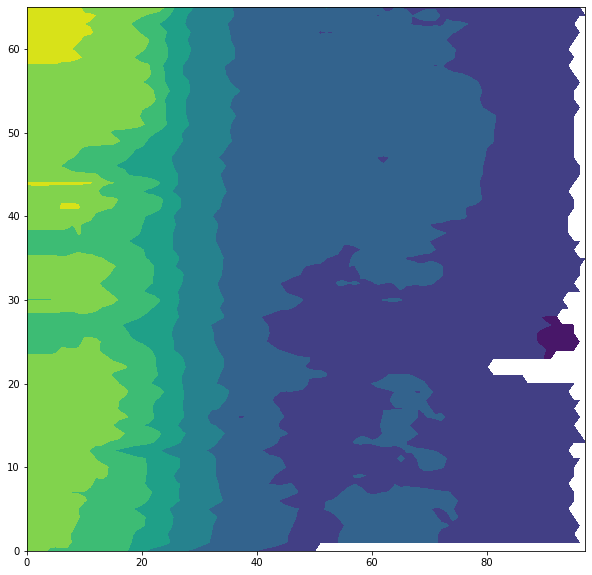

In [7]:
fig , ax = plt.subplots(figsize=(10,10))
ax.contourf(prof.PSAL);

However, we want to add the proper pressure levels since each profile has slightly different levels. For instance note the different values of the pressure observations for profile 3 and 4:

In [8]:
prof.PRES[3,:].values

array([   6.,    7.,    8.,    9.,   10.,   16.,   25.,   36.,   46.,
         55.,   66.,   76.,   86.,   96.,  106.,  115.,  125.,  135.,
        146.,  156.,  165.,  176.,  186.,  196.,  213.,  237.,  262.,
        288.,  313.,  338.,  363.,  388.,  413.,  438.,  463.,  488.,
        513.,  538.,  563.,  588.,  613.,  638.,  663.,  687.,  713.,
        738.,  763.,  788.,  813.,  838.,  863.,  888.,  914.,  938.,
        963.,  988., 1013., 1038., 1063., 1088., 1113., 1139., 1163.,
       1188., 1213., 1238., 1263., 1288., 1313., 1338., 1363., 1388.,
       1413., 1439., 1463., 1488., 1513., 1538., 1563., 1588., 1613.,
       1638., 1663., 1688., 1713., 1738., 1763., 1788., 1813., 1838.,
       1863., 1888., 1913., 1938., 1963., 1988., 2013., 2036.],
      dtype=float32)

In [9]:
prof.PRES[4,:].values

array([   6.,    7.,    8.,    9.,   10.,   16.,   25.,   35.,   45.,
         55.,   66.,   75.,   85.,   95.,  106.,  116.,  125.,  135.,
        145.,  156.,  165.,  175.,  186.,  196.,  213.,  238.,  263.,
        287.,  313.,  338.,  363.,  388.,  413.,  438.,  463.,  488.,
        513.,  538.,  563.,  588.,  613.,  638.,  663.,  689.,  713.,
        738.,  763.,  788.,  813.,  838.,  863.,  889.,  913.,  938.,
        963.,  988., 1013., 1038., 1063., 1089., 1113., 1138., 1163.,
       1188., 1213., 1238., 1263., 1289., 1313., 1338., 1363., 1388.,
       1413., 1438., 1462., 1488., 1513., 1538., 1563., 1588., 1613.,
       1639., 1663., 1688., 1713., 1737., 1763., 1788., 1813., 1837.,
       1863., 1888., 1913., 1938., 1963., 1978.,   nan,   nan],
      dtype=float32)

Therefore we need to do a little of interpolation into a common set of pressure values:

In [10]:
prei=np.arange(5,2005,5) # we define a common set of pressure values:

We define the new *vectors*

In [12]:
juld=prof.JULD.values
psal=prof.PSAL.values
temp=prof.TEMP.values
pres=prof.PRES.values

psali= np.zeros((juld.shape[0],prei.shape[0]))
psali.fill(np.nan)

tempi= np.zeros((juld.shape[0],prei.shape[0]))
tempi.fill(np.nan)

and then we interpolate the salinity and the temperature onto the new levels:

In [13]:
for ip in range(0,pres.shape[0]-1):
    psali[ip,:]=np.interp(prei,pres[ip,:],psal[ip,:])
    tempi[ip,:]=np.interp(prei,pres[ip,:],temp[ip,:])

and let's plot the time evolution of the saliniy measured by this float. in oceanography we usually call it a *section*

*This figure is a little more complex, Unfortunatly we can not teach everything AoS, and therefore we do not explain all the python code, but if you want to get extra information, please make and issue in [GitHub](https://github.com/euroargodev/argoonlineschool/issues)*

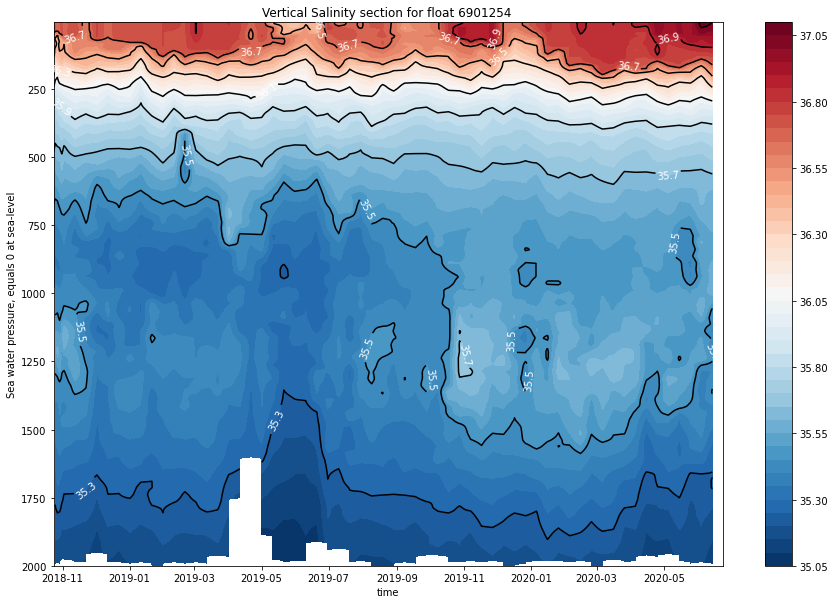

In [27]:
fig, ax = plt.subplots(figsize=(15,10))

#Draw the contours for the salinity
cs=ax.contourf(juld,prei,psali.transpose(),40,cmap="RdBu_r")

#Draw the contours lines to be labelled
cs2=ax.contour(juld,prei,psali.transpose(),colors=('k'), levels=cs.levels[::4])

#Since pressure increase away from the surface we invert the y-axis
ax.invert_yaxis()
ax.clabel(cs2, fmt='%2.1f', colors='w', fontsize=10)

#Add the titles
ax.set_title(f"Vertical Salinity section for float {prof.PLATFORM_NUMBER[0].astype(str).values}")
ax.set_xlabel(f"{prof.JULD.standard_name}")
ax.set_ylabel(f"{prof.PRES.long_name}")

#Add the colorbar
cbar=fig.colorbar(cs,ax=ax)

And the same for temperature:

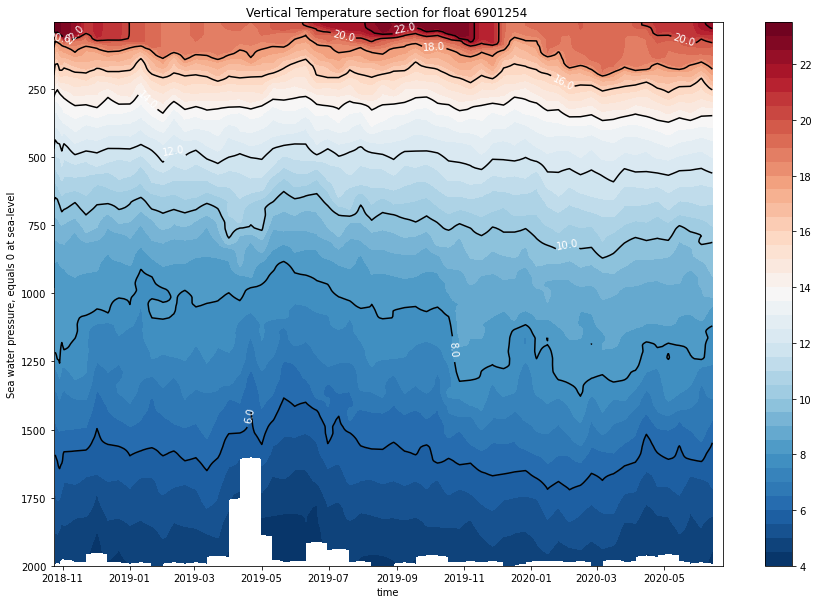

In [28]:
fig, ax = plt.subplots(figsize=(15,10))

cs=ax.contourf(juld,prei,tempi.transpose(),40,cmap="RdBu_r")
cs2=ax.contour(juld,prei,tempi.transpose(),colors=('k'), levels=cs.levels[::4])

ax.invert_yaxis()
ax.clabel(cs2, fmt='%2.1f', colors='w', fontsize=10)

ax.set_title(f"Vertical Temperature section for float {prof.PLATFORM_NUMBER[0].astype(str).values}")
ax.set_xlabel(f"{prof.JULD.standard_name}")
ax.set_ylabel(f"{prof.PRES.long_name}")

cbar=fig.colorbar(cs,ax=ax)

In oceanography, temperature-salinity diagrams, sometimes called T-S diagrams, are used to identify water masses. In a T-S diagram, rather than plotting plotting temperatute and salinity as a separate "profile," with pressure or depth as the vertical coordinate, potential temperature (on the vertical axis) is plotted versus salinity (on the horizontal axis). 

This diagrams area very useful since as long as it remains isolated from the surface, where heat or fresh water can be gained or lost, and in the absence of mixing with other water masses, a water parcel's potential temperature and salinity are conserved. Deep water masses thus retain their T-S characteristics for long periods of time, and can be identified readily on a T-S plot. 

In this case we add a colobar bar to show the pressure of each data point.


In [34]:
import seawater as sw

In [35]:
temp=prof.TEMP.values.flatten()
psal=prof.PSAL.values.flatten()
pres=prof.PRES.values.flatten()

compute potential temperature

In [36]:
ptmp=sw.ptmp(psal, temp, pres, pr=0)

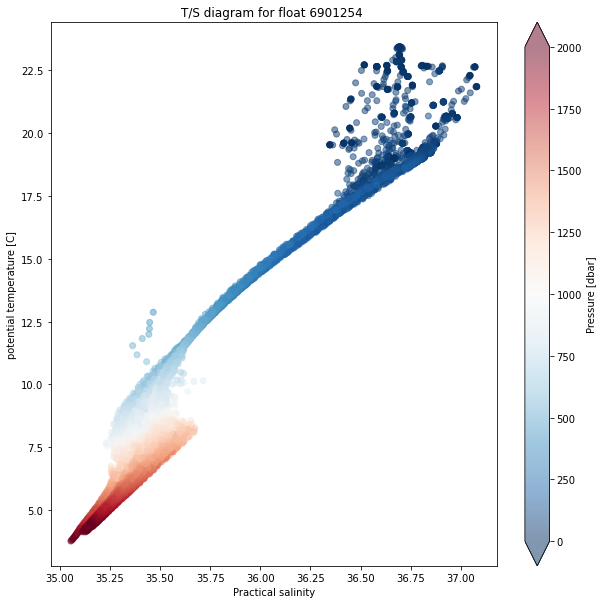

In [37]:
fig, ax = plt.subplots(figsize=(10,10))
sc=ax.scatter(psal, ptmp, c=c,alpha=0.5, cmap="RdBu_r",vmin=0, vmax=2000)
ax.set_title(f"T/S diagram for float {prof.PLATFORM_NUMBER[0].astype(str).values}")
ax.set_ylabel("potential temperature [C]")
ax.set_xlabel(f"{prof.PSAL.long_name}")
cbar=fig.colorbar(sc,extend='both');
cbar.set_label('Pressure [dbar]')

## Metadata

And of course, all the metadata information for each profile is included in the netCDF file:

In [38]:
for i1 in range(1,prof.sizes['N_PROF'],10):
    print(f"Cycle {prof.data_vars['CYCLE_NUMBER'].values.astype(int)[i1]}"
          f" Direction {prof.data_vars['DIRECTION'].values.astype(str)[i1]}"
          f" WMO {prof.data_vars['PLATFORM_NUMBER'].values.astype(str)[i1]}"
          f" Data Center {prof.data_vars['DATA_CENTRE'].values.astype(str)[i1]}"   
          f" Project {prof.data_vars['PROJECT_NAME'].values.astype(str)[i1]}" )

Cycle 1 Direction A WMO 6901254  Data Center IF Project ARGO SPAIN                                                      
Cycle 11 Direction A WMO 6901254  Data Center IF Project ARGO SPAIN                                                      
Cycle 21 Direction A WMO 6901254  Data Center IF Project ARGO SPAIN                                                      
Cycle 31 Direction A WMO 6901254  Data Center IF Project ARGO SPAIN                                                      
Cycle 41 Direction A WMO 6901254  Data Center IF Project ARGO SPAIN                                                      
Cycle 51 Direction A WMO 6901254  Data Center IF Project ARGO SPAIN                                                      
Cycle 61 Direction A WMO 6901254  Data Center IF Project ARGO SPAIN                                                      


We can see the WMO number, the DAC (IF, for Ifremer) and the owner of the float: Argo Spain 